# Spectral Representation Method
Author: Lohit Vandanapu
Date: August 19, 2018
Last Modified: May 09, 2019

In this example, the Spectral Representation Method is used to generate stochastic processes from a prescribed Power Spectrum. This example illustrates how to use the SRM class for 'n' dimensional and one variable case and compare the statistics of the generated stochastic processes with the expected values.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the SRM class from the StochasticProcesses module of UQpy.

In [1]:
from UQpy.stochastic_process import SpectralRepresentation
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
plt.style.use('seaborn')

The input parameters necessary for the generatino of the stochastic processes are given below:

In [2]:
n_sim = 1000 # Num of samples

n = 2 # Num of dimensions

m = 1 # Num of variables

T = 10
nt = 200
dt = T/nt
t = np.linspace(0, T-dt, nt)

# Frequency
W = np.array([1.0, 1.5])
nw = 100
dw = W / nw
x_list = [np.linspace(0, W[i] - dw[i], nw) for i in range(n)]
xy_list = np.array(np.meshgrid(*x_list, indexing='ij'))

Defining the Power Spectral Density(S)

In [3]:
S_nd_1v = 125 / 4 * np.linalg.norm(xy_list, axis=0) ** 2 * np.exp(-5 * np.linalg.norm(xy_list, axis=0))

Make sure that the input parameters are in order to prevent aliasing

In [4]:
t_u = 2*np.pi/2/W

if dt>t_u.all():
    print('Error')

In [5]:
SRM_object = SpectralRepresentation(n_sim, S_nd_1v, [dt, dt], dw, [nt, nt], [nw, nw], random_state=128)
samples_nd_1v = SRM_object.samples

/var/folders/t5/4jtc8k1902j5q91znr0l4z5r0000gn/T/ipykernel_15896/4056673640.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = pcolor(tt_list[0], tt_list[1], samples_nd_1v[0, 0], cmap='RdBu_r', vmin=-6, vmax=6)


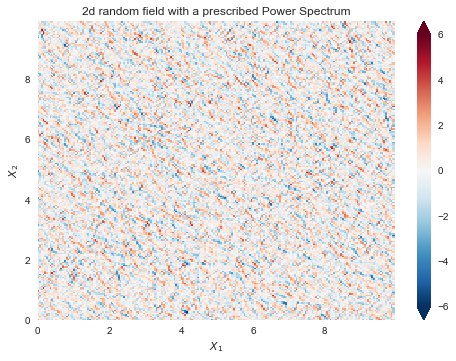

In [6]:
t_list = [t for _ in range(n)]
tt_list = np.array(np.meshgrid(*t_list, indexing='ij'))

fig1 = plt.figure()
plt.title('2d random field with a prescribed Power Spectrum')
pcm = pcolor(tt_list[0], tt_list[1], samples_nd_1v[0, 0], cmap='RdBu_r', vmin=-6, vmax=6)
plt.colorbar(pcm, extend='both', orientation='vertical')
plt.xlabel('$X_{1}$')
plt.ylabel('$X_{2}$')
plt.show()

In [7]:
print('The mean of the samples is ', np.mean(samples_nd_1v), 'whereas the expected mean is 0.000')
print('The variance of the samples is ', np.var(samples_nd_1v), 'whereas the expected variance is ', np.sum(S_nd_1v)*np.prod(dw)*(2**n))

The mean of the samples is  -5.17808018685173e-20 whereas the expected mean is 0.000
The variance of the samples is  1.6747736963355568 whereas the expected variance is  1.6747736963355586
